# Simulating Normal data

In this section we simulate some data from a normal distribution

## Heights example

Let's simulate a dataset with the heights of 10,000 men and 10,000 women, based on our knowledge that
<ul>
    <li> height is normally distributed
    <li> we know the mean and sd of mens' and womens' heights in the UK
</ul>


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Create the simulated dataset

We use the function `np.random.normal()` to create random numbers that follow a normal distribution. 


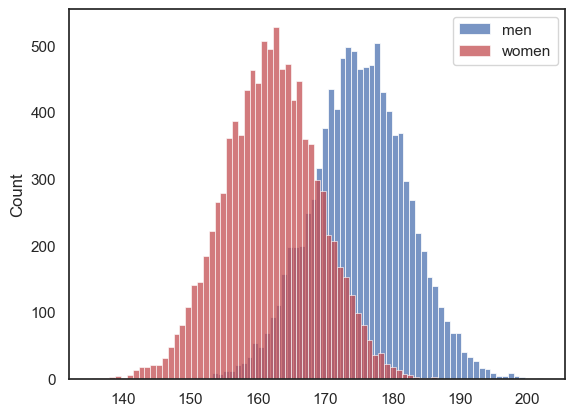

In [2]:
men = np.random.normal(175,7, [10000])
women = np.random.normal(162,7, [10000])

sns.histplot(men, color='b', label='men')
sns.histplot(women, color='r', label='women')
plt.legend()
plt.show()


<ul>
<li>Where in the code do we specify the mean of the desired distribution?
<li>Where in the code do we specify the sd of the desired distribution?
<li>Where in the code do we specify the sample size to be simulated?
</ul>

### The PDF and CMF

We can plot the theoretical distribution or Probability Density Function of the normal distribution using `scipy.stats`.

This is similar to plotting the PMF of the binomial: 

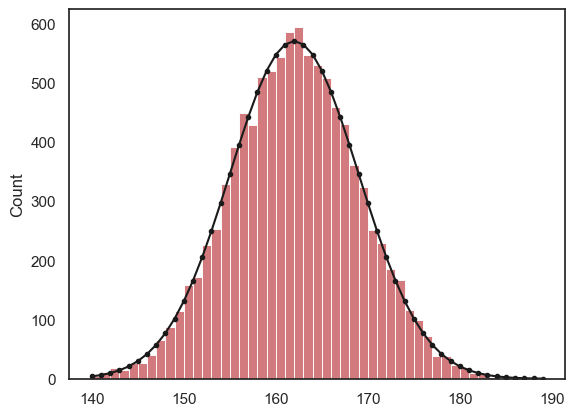

In [3]:
x = range(140,190,1)
p_x = stats.norm.pdf(x,162,7)
freq = p_x*10000 #(get expected frequencies by multiplying by n)

sns.histplot(women, bins=range(140,190,1), color='r', label='women')
plt.plot(x, freq, 'k.-')
plt.show()

If we want to know what proportion of women are over 180cm (6') tall, we can work it out using the CDF - the proportion *greater than* 180cm tall is 1-CDF(180)

In [4]:
1 - stats.norm.cdf(180,162,7)

0.005063995274695365

... about half of one percent, or one in two hundred women are over 180cm/6' tall.

<ul>
    <li>Can you check what proportion of simulated women were over 180cm tall? 
    <li>Does it match the value from the theoretical CDF quite well?
</ul>

### Parameters of the normal distrubition

All normally distributed variables have the same <i>shape</i> of distribution (the bell curve), but two parameters determine the location and spread of the distribution - 


* the mean $\mu$ determines the location of the curve along the x axis
* the standard deviation $\sigma$ determines the spread or width of the curve
    
We sometimes describe a normal distribution using the following notation:

$$ x \sim  \mathcal{N}(\mu, \sigma) $$
    
pronounced "$x$ follows a Normal with mean $\mu$ and standard deviation $\sigma$ "
    
for example
    
$$ x \sim  \mathcal{N}(162, 7) $$
    
... describes the distribution of womens' heights used above

Let's plot some examples:

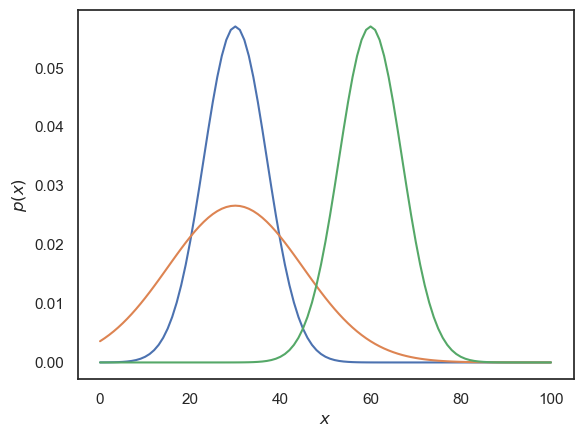

In [5]:
x = range(101)

plt.plot(x,stats.norm.pdf(x,30,7) )
plt.plot(x,stats.norm.pdf(x,30,15))
plt.plot(x,stats.norm.pdf(x,60,7) )

plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

The code above plots three normal distributions. 
<ul>
    <li> what are the means and standard deviations of the distributions?
    <li> which line of code plots which?
    <li> add a line of code to add a normal N(50,5)
</ul>

## Z-score

For normally distributed variables, we sometimes refer to the Z-score of a value. 

The Z-score tells us how many standard deviations above or below the mean of the distribution a given value lies.

For example, for women's heights the standard deviation $\sigma$ is 7 and the mean is 162cm, so a woman 169cm tall (one sd above the mean) has a Z-score of 1

A woman whose height is $2\sigma$ below the mean (148cm) has a Z-score of -2.

<ul>
<li> What is the Z-score of a woman whose height is 172.5cm?
<li> What about a woman whose height is 150cm?
</ul>

Reporting the Z-score of a value is useful as we automatically know where the value sits on the normal curve without having to check the normal CDF on Python or in a table (because the probability of obtaining a given Z-score does not depend on the mean and sd of the given dataset)

For example, a Z-score greater than 1.65 occurs only 5% of the time and a Z score greater than 2.6 occurs only 1% of the time.